## 0415
___
#### 01 Review
- 지도 학습 : 참값을 주고 ML / 회귀 : 연속형, 분류 : 범주형
- 비지도 학습 : 참값을 주지 않고 ML


- knn
    - k, n-neighbor 
    - 거리에 따른 계산 : 유클리드(2), 민코프스키(n), 맨하튼(1, 네비게이션)
    - 거리에 영향을 미치기 때문에 scale 정규화가 필수.

- naive Bayse (순진한 베이지안) : 분류에만 사용
    - 빈도주의 : 결정론자
    - 비결정론
    - posterior = likelihood * prior
    - y의 범주에 따라 확률을 나누고 가장 높은 확률일 경우로 분류
    - (Naive) 확률에 들어가는 전제 조건 : 조건부 독립 P(x1, x2 | y) = P(x1 | y) * P(x2 | y)
    - 조건부 독립 여부에 따라 모델의 효율이 결정된다. 
    - ex) 텍스트 분석, 스팸메일 판별, 신용평가
    - 정규화가 필요하지 않다. 확률을 따지기 때문에
        - Gnb : 입력 변수(X)들이 가우시안 분포를 가진다고 가정. 확률밀도 함수의 각각의 y값에 따라 입력변수 x의 범주를 판단. X가 연속형
        - Mnb : X가 범주 수가 3개 이상인 X에 대해서 계산
        - Bnb : y와 x에 대한 빈도표 계산. X가 범주형이며, 이항인 경우
            - decision function으로 나온 결과들을 이용해 크기 비교
            - 데이터 변수의 유형이 다르다면 모델을 여러 개 만들어서 각각의 확률을 구하고 나중에 확률을 다 곱해준 결과값 사용.
            - log_proba로 나온 값들은 곱하지 않고 더해주면 된다. 
    
- Regression
    - y가 연속형에 사용. but logistic은 범주형
    - wx+b+e(잔차)
    - e(잔차) : 정규분포, 평균 0, 분산, w와 e는 독립, 분산이 ~ / 평균이 0이 안리ㅏ면 b를 잘못 계산한 것.
    - 분포가 비대칭인 경우 : exp, log, 제곱근 사용
    - 회귀에 naive의 가정을 대입하기 어렵다. 다중공선성을 가지면, 이상치가 나옴.
        - logistic = P(y=0) or p(y=1)을 예측. sigmoid 사용
        

- SVC
    - 주로 분류에 사용하지만, SVR을 사용하기도 한다.
    - hyper plane이라는 결정경계선을 가짐.
    - margine, hyper plane - sv 와의 거리 차이
    - 거리를 기반으로 하기 때문에 정규화가 필요하다.
    - 폴라 좌표를 사용하면 공간뒤틀기 좋음.
    - kernel은 비선형좌표들을 분류할 때
___

- ML, DL에 각각 사용되는 모델은 제한적이다.
- DL : Reg, Logistic, SVM
- ML : 각각의 데이터에 맞게

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import mglearn

In [2]:
from matplotlib import font_manager
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
# font_name = font_manager.FontProperties(fname="NanumBarunGothic.ttf").get_name()
plt.rc('font', family=font_name)
plt.rcParams["font.family"] = font_name
plt.rcParams['axes.unicode_minus'] = False

___
### 결정 트리(DTC, DTR)
- Divide and conquer?
- DTR : 분산을 어느만큼 줄이는지가 기준.
- 의사결정 나무
- 연속형, 범주형 데이터 구분없이 사용 가능
- 정규화가 필요 없음.
- root  - split point(질문) / branch(중간 노드) - leaf(잎)
- 질문을 던지는 기준은 최대한 순수한 집단으로 나눌 수 있는 경우를 최우선으로 한다. 1~2정도 남은 수는 오차로 생각
- 나누는 기준은 축의 평형 방향으로만 가능하다. 사선 X, 사선은 LogisticReg, SVC 사용
- 깊이를 너무 많이 만들면(split point를 많이 만드는 경우) overfitting될 가능성이 높다.

#### random forest
- 무수히 많은 나무들을 생성하고 voting
- post-pruning < random forest
- y = sum(DT) / m

#### Gradient Boosting Decision Tree(GBDT)
- boosting : 임의의 데이터를 뽑아서 예측하고, 부족한 부분에서 다시 뽑아서 다시 학습 .....
- 좋은 나무 1개를 만든 후, 부족한 부분에 overfitting되지 않는 선에서 적절한 나무들을 생성해서 채워 나가는 방법
- y = F1(X) + e1
- y = F1(X) + F2(x) + e2, e1 = F2(X) + e2 / error를 계속 줄여나감.
- F2(X) = (y-F1(x)) + e2 / residence(오차), gradient

#### egboot
- 과도한 gradient boosting
- 최근 가장 좋은 성능을 냄.
- 미분 연산 사용
- 과도한 연산으로 속도는 느림

#### ms에서 egboot 다음으로 만든 것
- egboot보다 정확도는 다소 부족함 
- But 연산속도는 빠름

In [3]:
# !pip install graphviz
# !conda install graphviz

In [4]:
# mglearn.plots.plot_animal_tree()

#### 결정 트리 만들기

In [5]:
# mglearn.plots.plot_tree_progressive()

#### 결정 트리의 복잡도 제어하기
- 사전 가지치기(pre-pruning) : leaf의 갯수를 제한, 나눌 때 필요한 데이터의 수 제한, 깊이(depth) 제한 : 주로 5로 설정
- 사후 가지치기(post-pruning) : 최대한 리프를 만들고, validation set을 이용하여 entropy 감소의 한계가 온 경우 가지를 제거하는 방법
    - Decision-tree-post-pruning 코드 참조.
- 사후 가지치기가 보통 성능은 좋지만, 다른 좋은 방법(ex) random forest)들도 있다.

#### 결정 트리 분석
#### parameter
- criterion
    - gini : 부익부 빈익빈, entropy : 무질서도 측정 둘 다 범주형일 경우, std : 분산 조절
- splitter
    - 가장 순수하게 = best, 빠른 연산 = random
- max_depth : 최대 깊이 수
- min_samples_split : 나누기 위한 최소치
- min_samples_leaf : leaf가 되기 위한 최소치 / 정확한 수량
- min_weight_fraction_leaf : leaf 노드가 되기 위한 전체 n_samples에 대한 비율 / 위와 동일하지만 비율
- max_features : split을 찾기 위한 변수 종류의 제한값
- random_state
- max_leaf_nodes : leaf note의 최대치
- min_impurity_decrease : gini, entropy, std의 값이 일정 수준 줄어들지 않으면 tree 생성 X 
- min_impurity_split
- class_weight : None : 모든 class의 가중치 = 1, 타겟 y의 각 label 마다, 가중치가 제시되어야 한다. y가 3개라면 3개
    - 이는 나중에 sample_weight에 곱해진다.
- loss : 부정확도 측정. 즉, loss를 줄이면 정확도가 올라간다.
- presort : 사전 정렬

#### 속성
- feature importance : split point의 순서에 따라 중요도가 다르므로, 중요도를 나타냄.
    - 복잡한 알고리즘을 사용하기 전, 가장 성능이 괜찮은 1가지를 먼저 찾아야 함.
    - 소규모 조직에서 더욱 효과적. 처음부터 완벽하게 하려고하면 실패할 가능성이 높다.
- tree

#### 함수
- decision_path : leaf의 path 확인
- apply : leaf의 index로 접근.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
# stratify : target이 가진 각각의 성분의 비율로.
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


- tree를 최대치까지 만듦.
- train set == 1

In [7]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


- max_depth == 4

In [8]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

In [9]:
# import graphviz

# with open("tree.dot", encoding='UTF-8') as f:
#     dot_graph = f.read()
# display(graphviz.Source(dot_graph))

#### 트리의 특성 중요도
- 변수의 특정 값을 기준으로 가지치기 하기.

In [10]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


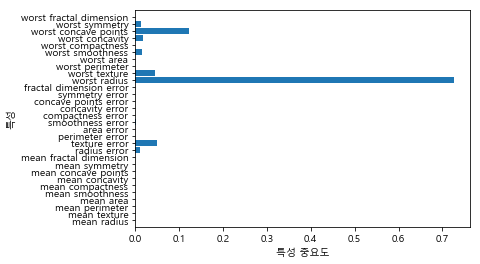

In [11]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

- 중요도 0이 중요하지 않다는 의미가 아니라, worst radius에 의해 설명이 되는 변수이므로 중요도가 낮아진 것.
- 즉, worst radius 제거하면, 중요도가 낮게 측정되었던 변수들의 중요성이 올라가기도 한다.

Feature importances: [0. 1.]


ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

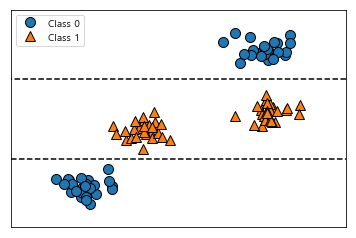

In [72]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

- 위와 같이 decision tree는 축의 평형에서만 분류됨.

Text(0, 0.5, '가격 ($/Mbyte)')

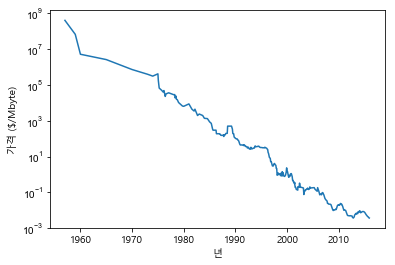

In [80]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(ram_prices.date, ram_prices.price) # log scale로 변경
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

- 지수성으로 올라가는 데이터는 log scale로 변경해줄 것.

#### DTR(회귀 트리)
- 학습 범위를 벗어나면 예측이 불가능하다. 즉, 범위 밖은 예측하면 안 된당.
    - 학습 범위 밖 : extrapolation(외삽)
- cf) LinearReg는 학습 범위를 벗어나도 대략적으로 예측 가능.
- 학습 범위 밖의 값을 예측하고 싶다면, extrapolation의 범위에 해당하는 데이터를 더 가져와야한당.
- 예측이 가능하긴 하지만 학습 범위를 벗어나면 하지 않는 것이 맞다.

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

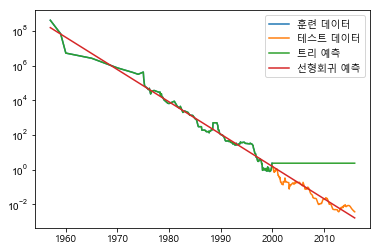

In [82]:
plt.yticks(fontname = "Arial") # 한글 폰트가 지수에 음수를 표시하지 못하므로 ytick의 폰트를 바꾸어 줍니다.
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

- 2000년 이후는 학습 범위를 벗어났기 때문에 DTR은 예측 불가능, LinearReg는 대략적인 예측을 한 모습.
- 과거의 시간에 있던 데이터를 이용해서 미래를 예측하는 방법 : forecasting
- 시계열 데이터는 아리마? 를 이용해서 예측한다.
- not prediction

#### 장단점과 파라미터
- 실행하기 용이하다.
- 만들어진 모델을 쉽게 시각화할 수 있어서 비전문가도 이해하기 쉽다.
- overfitting을 방지하기 위해 앙상블을 이용함.

### 결정 트리의 앙상블
#### 랜덤 포레스트
##### 랜덤 포레스트 구축
##### 랜덤 포레스트 분석

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

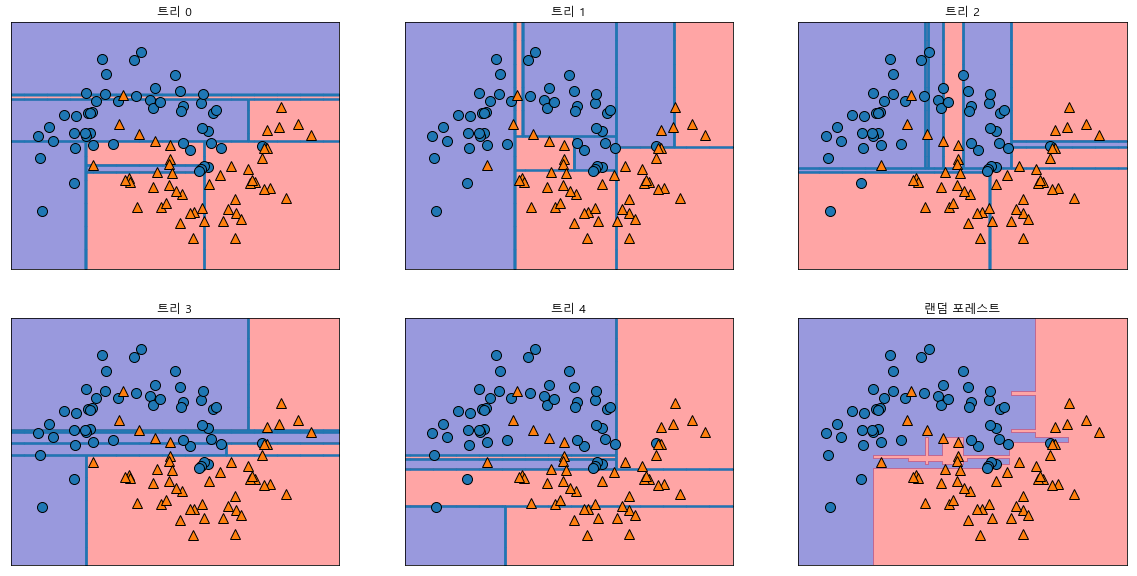

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


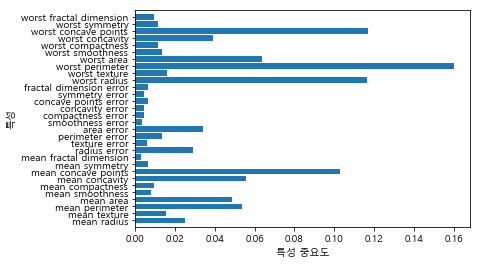

In [21]:
plot_feature_importances_cancer(forest)

##### 장단점과 파라미터

#### 그래디언트 부스팅 회귀 트리

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.958


In [23]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.972


In [24]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.965


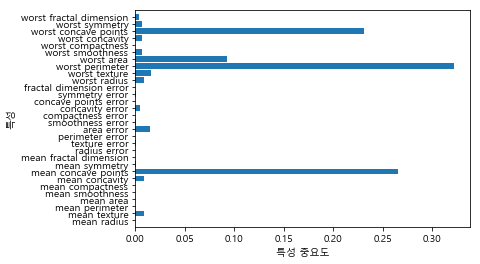

In [25]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

##### 장단점과 파라미터

### 커널 서포트 벡터 머신
#### 선형 모델과 비선형 특성

In [26]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

NameError: name 'make_blobs' is not defined

Text(0, 0.5, '특성 1')

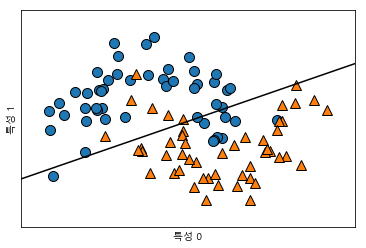

In [27]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(max_iter=10000).fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

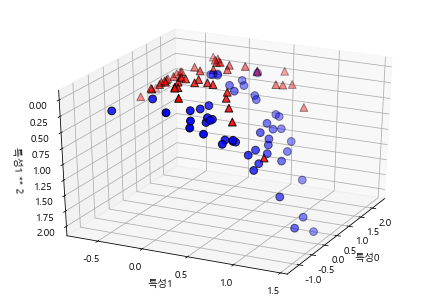

In [28]:
# 두 번째 특성을 제곱하여 추가합니다
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")
plt.show()

Text(0.5, 0, '특성1 ** 2')

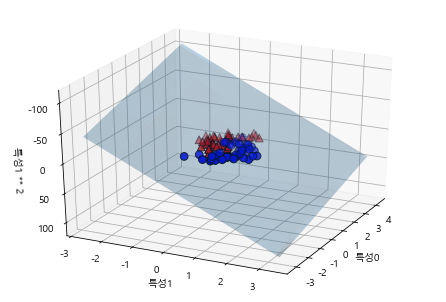

In [29]:
linear_svm_3d = LinearSVC(max_iter=10000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

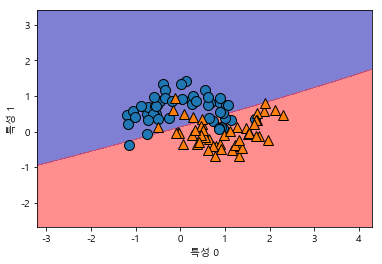

In [30]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

#### 커널 기법
#### SVM 이해하기
\begin{align*}
\end{align*}

Text(0, 0.5, '특성 1')

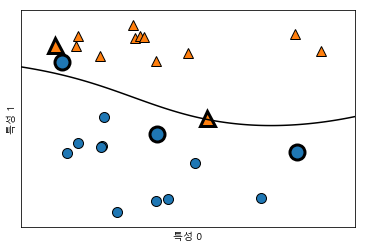

In [31]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)                                                
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# 서포트 벡터
sv = svm.support_vectors_
# dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

#### SVM 파라미터 튜닝

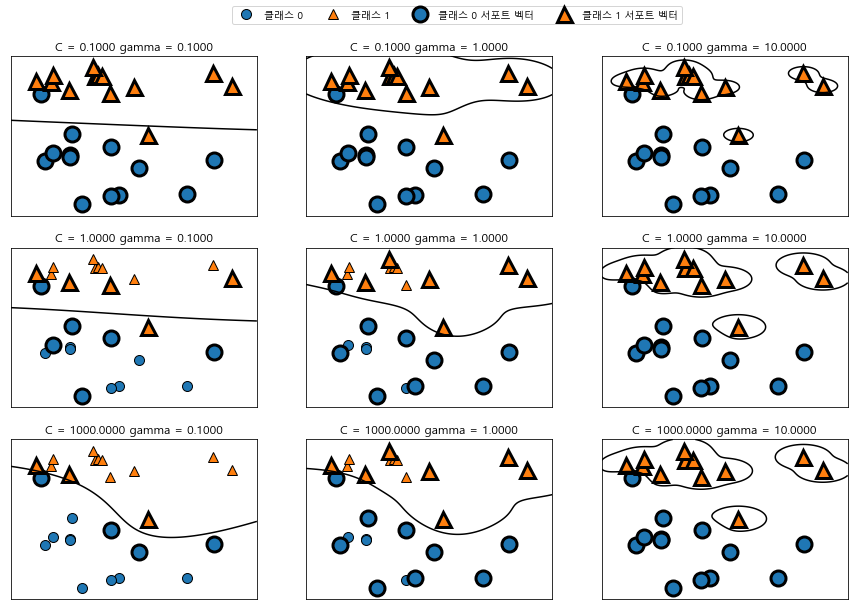

In [32]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"],
                  ncol=4, loc=(.9, 1.2))

사이킷런 0.20 버전에서 `SVC` 클래스의 `gamma` 매개변수 옵션에 `auto`외에 `scale`이 추가되었습니다. `auto`는 `1/n_features`, 즉 특성 개수의 역수입니다. `scale`은 `1/(n_features * X.std())`로 스케일 조정이 되지 않은 특성에서 더 좋은 결과를 만듭니다. 사이킷런 0.22 버전부터는 `gamma` 매개변수의 기본값이 `auto`에서 `scale`로 변경됩니다. 서포트 벡터 머신을 사용하기 전에 특성을 표준화 전처리하면 `scale`과 `auto`는 차이가 없습니다. 경고를 피하기 위해 명시적으로 `auto` 옵션을 지정합니다.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 1.00
테스트 세트 정확도: 0.63


Text(0, 0.5, '특성 크기')

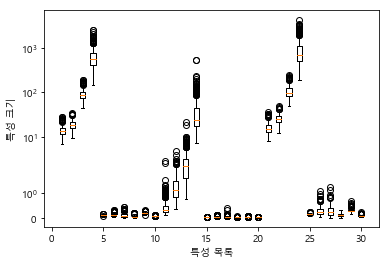

In [34]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

#### SVM 을 위한 데이터 전처리

In [35]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1 임
X_train_scaled = (X_train - min_on_training) / range_on_training
print("특성별 최솟값\n{}".format(X_train_scaled.min(axis=0)))
print("특성별 최댓값\n {}".format(X_train_scaled.max(axis=0)))

특성별 최솟값
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [36]:
# 테스트 세트에도 같은 작업을 적용하지만
# 훈련 세트에서 계산한 최솟값과 범위를 사용합니다(자세한 내용은 3장에 있습니다)
X_test_scaled = (X_test - min_on_training) / range_on_training

In [37]:
svc = SVC(gamma='auto')
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.948
테스트 세트 정확도: 0.951


In [38]:
svc = SVC(gamma='auto', C=1000)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.972


#### 장단점과 파라미터

### 신경망 (딥러닝)
#### 신경망 모델

In [39]:
mglearn.plots.plot_logistic_regression_graph()

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [40]:
mglearn.plots.plot_single_hidden_layer_graph()

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

Text(0, 0.5, 'relu(x), tanh(x)')

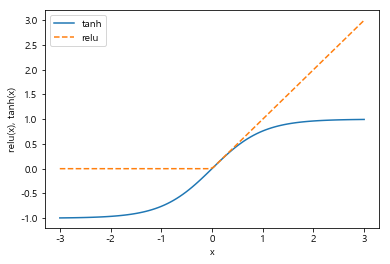

In [41]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), linestyle='--', label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

In [42]:
mglearn.plots.plot_two_hidden_layer_graph()

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

#### 신경망 튜닝

Text(0, 0.5, '특성 1')

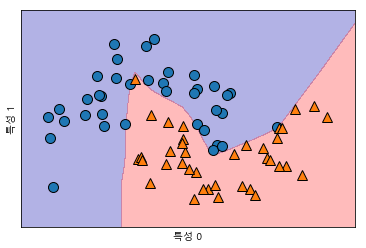

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

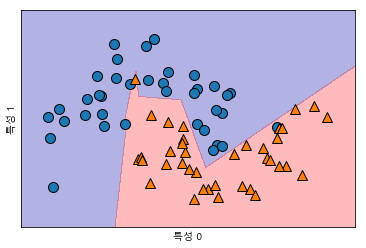

In [44]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

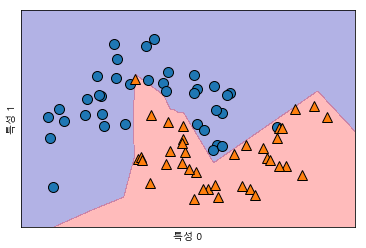

In [45]:
# 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

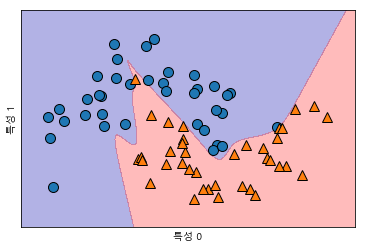

In [46]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

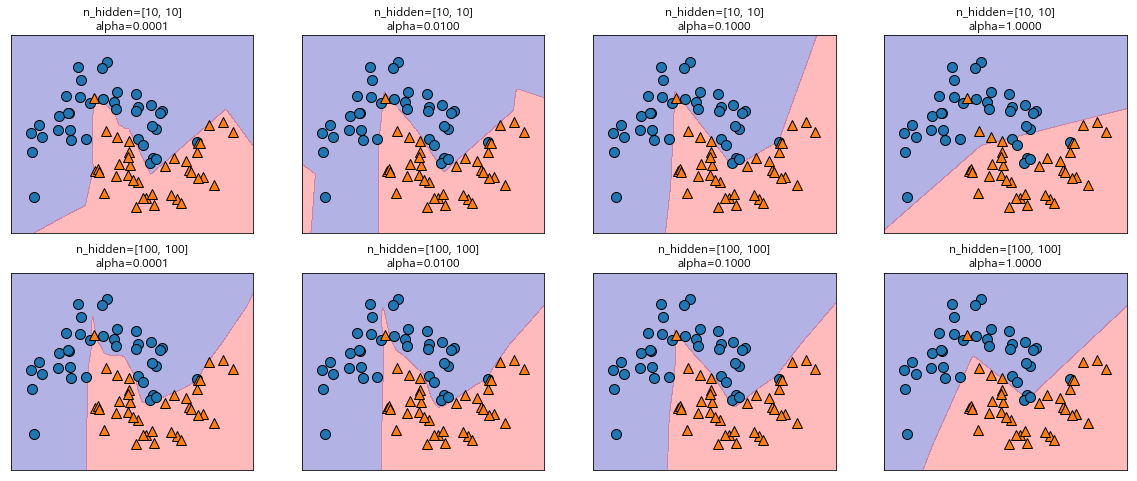

In [47]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

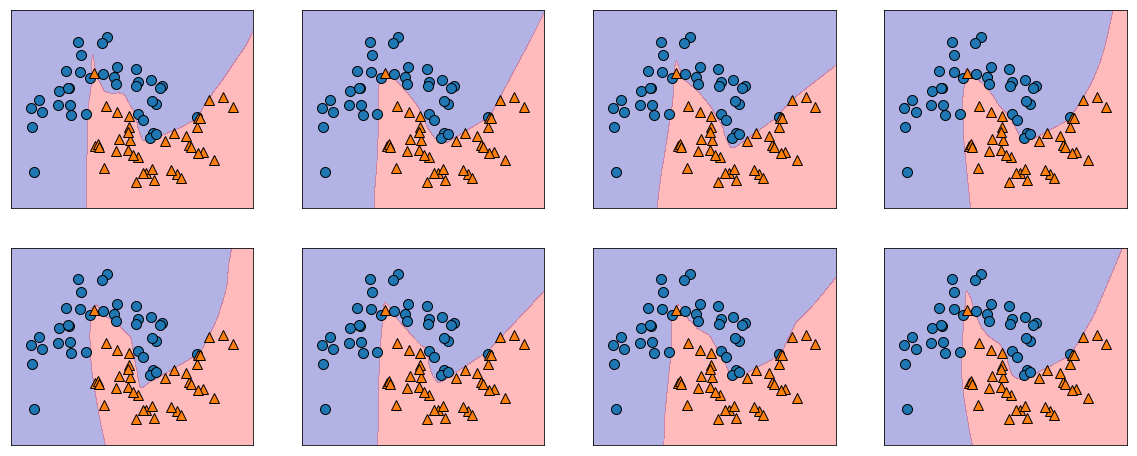

In [48]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [49]:
print("유방암 데이터의 특성별 최대값:\n{}".format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최대값:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


In [51]:
# 훈련 세트 각 특성의 평균을 계산합니다
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산합니다
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면
# 평균 0, 표준 편차 1 인 데이터로 변환됩니다.
X_train_scaled = (X_train - mean_on_train) / std_on_train
# (훈련 데이터의 평균과 표준 편차를 이용해) 같은 변환을 테스트 세트에도 합니다
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.991
테스트 세트 정확도: 0.965


C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [52]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


In [53]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("훈련 세트 정확도: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
훈련 세트 정확도: 0.972


In [54]:
mlp.coefs_[0].std(axis=1), mlp.coefs_[0].var(axis=1)

(array([0.02559193, 0.04066835, 0.03308025, 0.03081333, 0.01669964,
        0.01838658, 0.03626209, 0.04066151, 0.02432519, 0.01737967,
        0.05508384, 0.01659837, 0.04014836, 0.036805  , 0.0131538 ,
        0.03408178, 0.01182728, 0.015795  , 0.01424585, 0.02966082,
        0.04854174, 0.05185808, 0.04186009, 0.04332929, 0.03185674,
        0.01475534, 0.04066124, 0.04863656, 0.03751535, 0.0262638 ]),
 array([0.00065495, 0.00165391, 0.0010943 , 0.00094946, 0.00027888,
        0.00033807, 0.00131494, 0.00165336, 0.00059171, 0.00030205,
        0.00303423, 0.00027551, 0.00161189, 0.00135461, 0.00017302,
        0.00116157, 0.00013988, 0.00024948, 0.00020294, 0.00087976,
        0.0023563 , 0.00268926, 0.00175227, 0.00187743, 0.00101485,
        0.00021772, 0.00165334, 0.00236552, 0.0014074 , 0.00068979]))

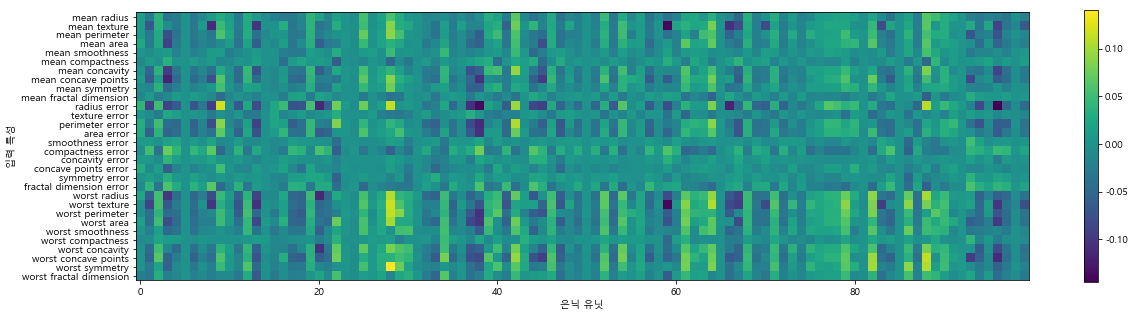

In [55]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("은닉 유닛")
plt.ylabel("입력 특성")
plt.colorbar()

#### 장단점과 파라미터
##### 신경망의 복잡도 추정

### 분류 예측의 불확실성 추정

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# 예제를 위해 클래스의 이름을 "blue" 와 "red" 로 바꿉니다
y_named = np.array(["blue", "red"])[y]

# 여러개의 배열을 한꺼번에 train_test_split 에 넣을 수 있습니다
# 훈련 세트와 테스트 세트로 나뉘는 방식은 모두 같습니다.
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# 그래디언트 부스팅 모델을 만듭니다
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

#### 결정 함수

In [57]:
print("X_test.shape: {}".format(X_test.shape))
print("결정 함수 결과 형태: {}".format(gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
결정 함수 결과 형태: (25,)


In [58]:
# 결정 함수 결과 중 앞부분 일부를 확인합니다
print("결정 함수:\n{}".format(gbrt.decision_function(X_test)[:6]))

결정 함수:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [59]:
print("임계치와 결정 함수 결과 비교:\n{}".format(
      gbrt.decision_function(X_test) > 0))
print("예측:\n{}".format(gbrt.predict(X_test)))

임계치와 결정 함수 결과 비교:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [60]:
# 불리언 값을 0과 1로 변환합니다
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# classes_에 인덱스로 사용합니다
pred = gbrt.classes_[greater_zero]
# pred 와 gbrt.predict의 결과를 비교합니다
print("pred 는 예측 결과와 같다: {}".format(
      np.all(pred == gbrt.predict(X_test))))

pred 는 예측 결과와 같다: True


In [61]:
decision_function = gbrt.decision_function(X_test)
print("결정 함수 최소값: {:.2f} 최대값: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

결정 함수 최소값: -7.69 최대값: 4.29


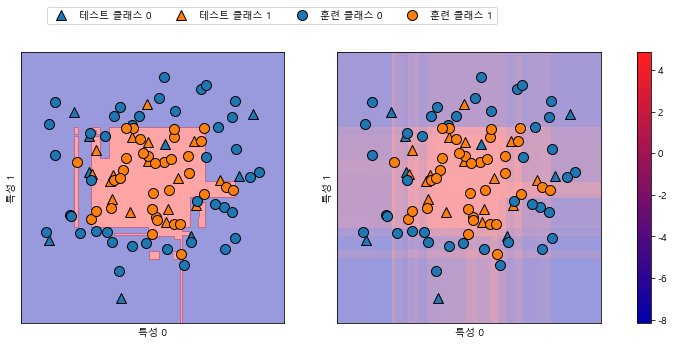

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0",
                "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))

#### 예측 확률

In [63]:
print("확률 값의 형태: {}".format(gbrt.predict_proba(X_test).shape))

확률 값의 형태: (25, 2)


In [64]:
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("Predicted probabilities:\n{}".format(
      gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


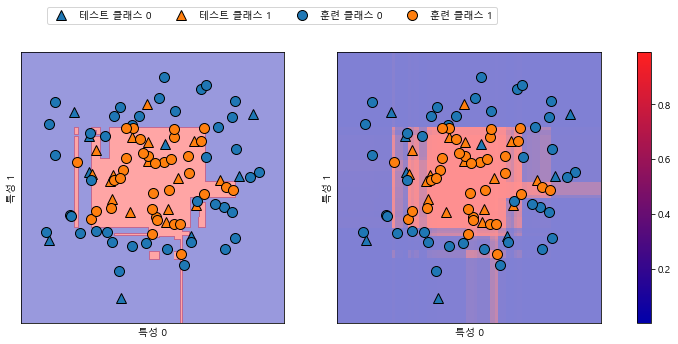

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # 훈련 포인트와 테스트 포인트를 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
# colorbar 를 감추지 않습니다.
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["테스트 클래스 0", "테스트 클래스 1", "훈련 클래스 0",
                "훈련 클래스 1"], ncol=4, loc=(.1, 1.1))

![](images/plot_classifier_comparison.png)

#### 다중 분류에서의 불확실성

In [66]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [67]:
print("결정 함수의 결과 형태: {}".format(gbrt.decision_function(X_test).shape))
# plot the first few entries of the decision function
print("결정 함수 결과:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

결정 함수의 결과 형태: (38, 3)
결정 함수 결과:
[[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]]


In [68]:
print("가장 큰 결정 함수의 인덱스:\n{}".format(
      np.argmax(gbrt.decision_function(X_test), axis=1)))
print("예측:\n{}".format(gbrt.predict(X_test)))

가장 큰 결정 함수의 인덱스:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [69]:
# predict_proba 결과 중 앞부분 일부를 확인합니다
print("예측 확률:\n{}".format(gbrt.predict_proba(X_test)[:6]))
# 행 방향으로 확률을 더하면 1 이 됩니다
print("합: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

예측 확률:
[[0.10664722 0.7840248  0.10932798]
 [0.78880668 0.10599243 0.10520089]
 [0.10231173 0.10822274 0.78946553]
 [0.10664722 0.7840248  0.10932798]
 [0.10825347 0.66344934 0.22829719]
 [0.78880668 0.10599243 0.10520089]]
합: [1. 1. 1. 1. 1. 1.]


In [70]:
print("가장 큰 예측 확률의 인덱스:\n{}".format(
      np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("예측:\n{}".format(gbrt.predict(X_test)))

가장 큰 예측 확률의 인덱스:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


사이킷런 0.20 버전에서 `LogisticRegression`의 `multi_class` 매개변수 옵션에 `auto`가 추가되었습니다. `auto`로 설정하면 이진 분류이거나 `solver`가 `liblinear`일 경우에는 `ovr`을 선택하고 그 외에는 `multinomial`을 선택합니다. 사이킷런 0.22 버전부터는 `multi_class` 매개변수의 기본값이 `ovr`에서 `auto`로 변경됩니다. 여기서는 경고를 피하기 위해 명시적으로 `ovr` 옵션을 지정합니다.

In [71]:
logreg = LogisticRegression(solver='liblinear', multi_class='ovr')

# iris 데이터셋의 타깃을 클래스 이름으로 나타내기
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("훈련 데이터에 있는 클래스 종류: {}".format(logreg.classes_))
print("예측: {}".format(logreg.predict(X_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("가장 큰 결정 함수의 인덱스: {}".format(argmax_dec_func[:10]))
print("인덱스를 classses_에 연결: {}".format(
      logreg.classes_[argmax_dec_func][:10]))

NameError: name 'LogisticRegression' is not defined

### 요약 및 정리